

```
# This is formatted as code
```



# Setup

In [144]:
import pandas as pd
import numpy as np
import re

In [145]:
crashes_url = 'https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=download'
df_crashes = pd.read_csv(crashes_url, low_memory=False)

persons_url = 'https://data.cityofnewyork.us/api/views/f55k-p6yu/rows.csv?accessType=download'
df_persons = pd.read_csv(persons_url, low_memory=False)

#crashes_path = 'C:\\Users\\belal\\OneDrive\\Desktop\\farah data engineering\\Data_eng_project.ipynb\\NYC_DATA\\Crashes.csv'
#persons_path = 'C:\\Users\\belal\\OneDrive\\Desktop\\farah data engineering\\Data_eng_project.ipynb\\NYC_DATA\\Persons.csv'

#df_crashes = pd.read_csv(crashes_path)
#df_persons = pd.read_csv(persons_path)

print(df_crashes.shape, df_persons.shape)



C:\Users\belal\AppData\Local\Temp\ipykernel_36592\3888205893.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_crashes = pd.read_csv(crashes_path)


(2222046, 29) (5825115, 21)


# EDA

## NYC Motor vehicle collision-crashes

In [146]:
df_crashes.sample(5)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
267323,07/31/2023,15:25,NaN,NaN,40.868040,-73.879105,"(40.86804, -73.879105)",SOUTHERN BOULEVARD,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4650355,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
4363,09/10/2021,9:33,NaN,NaN,NaN,NaN,NaN,FLATLAND AVENUE,EAST 37 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4457879,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
487286,11/23/2019,15:45,NaN,NaN,40.766685,-73.892136,"(40.766685, -73.892136)",77 STREET,ASTORIA BOULEVARD,NaN,...,NaN,NaN,NaN,NaN,4246975,Sedan,NaN,NaN,NaN,NaN
1333179,03/16/2016,21:04,QUEENS,11422.0,NaN,NaN,NaN,BROOKVILLE BOULEVARD,SUNRISE HIGHWAY,NaN,...,NaN,NaN,NaN,NaN,3423703,4 dr sedan,NaN,NaN,NaN,NaN
65048,10/30/2021,4:00,BRONX,10471.0,40.900223,-73.907616,"(40.900223, -73.907616)",NaN,NaN,5245 NETHERLAND AVENUE,...,NaN,NaN,NaN,NaN,4473912,Dump,NaN,NaN,NaN,NaN


In [147]:
print("Rows:", df_crashes.shape[0])
print("Columns:", df_crashes.shape[1])

Rows: 2222046
Columns: 29


In [148]:
df_crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222046 entries, 0 to 2222045
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [149]:
df_crashes.describe()

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1.981675e+06,1.981675e+06,2.222028e+06,2.222015e+06,2.222046e+06,2.222046e+06,2.222046e+06,2.222046e+06,2.222046e+06,2.222046e+06,2.222046e+06
mean,4.058919e+01,-7.368207e+01,3.284248e-01,1.584148e-03,5.965223e-02,7.839622e-04,2.921092e-02,1.260100e-04,2.349096e-01,6.444511e-04,3.266896e+06
std,2.339474e+00,4.347933e+00,7.150217e-01,4.204707e-02,2.501649e-01,2.862430e-02,1.706670e-01,1.126473e-02,6.761586e-01,2.776592e-02,1.509632e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066733e+01,-7.397453e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.191632e+06
50%,4.072031e+01,-7.392673e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.747318e+06
75%,4.076956e+01,-7.386657e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.303043e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.858860e+06


In [150]:
df_crashes.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [151]:
numeric_cols = df_crashes.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_crashes.select_dtypes(include=['object']).columns

print("Numerical columns:", list(numeric_cols))
print("Categorical columns:", list(categorical_cols))

Numerical columns: ['LATITUDE', 'LONGITUDE', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'COLLISION_ID']
Categorical columns: ['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']


In [152]:
for col in categorical_cols:
    print(f"Column: {col}")
    print(df_crashes[col].astype(str).unique()[:15])  # show only first 15
    print("--------------------------------------------------")

Column: CRASH DATE
['09/11/2021' '03/26/2022' '11/01/2023' '06/29/2022' '09/21/2022'
 '04/26/2023' '12/14/2021' '04/14/2021' '12/13/2021' '12/11/2021'
 '12/12/2021' '11/02/2023' '12/16/2021' '04/27/2023' '09/22/2022']
--------------------------------------------------
Column: CRASH TIME
['2:39' '11:45' '1:29' '6:55' '13:21' '13:30' '7:12' '8:01' '22:20' '9:35'
 '8:13' '12:47' '17:05' '8:17' '21:10']
--------------------------------------------------
Column: BOROUGH
['nan' 'BROOKLYN' 'BRONX' 'MANHATTAN' 'QUEENS' 'STATEN ISLAND']
--------------------------------------------------
Column: ZIP CODE
['nan' '11230.0' '11208.0' '11233.0' '10475.0' '11207.0' '10017.0'
 '11413.0' '11434.0' '11217.0' '11226.0' '10463.0' '10001.0' '11372.0'
 '10301.0']
--------------------------------------------------
Column: LOCATION
['nan' '(40.62179, -73.970024)' '(40.667202, -73.8665)'
 '(40.683304, -73.917274)' '(40.709183, -73.956825)'
 '(40.86816, -73.83148)' '(40.67172, -73.8971)' '(40.75144, -73.97397)'

In [153]:
for col in categorical_cols:
    mode_value = df_crashes[col].mode(dropna=True)
    print(f"Mode of {col}: {mode_value[0] if not mode_value.empty else 'No mode'}")

Mode of CRASH DATE: 01/21/2014
Mode of CRASH TIME: 16:00
Mode of BOROUGH: BROOKLYN
Mode of ZIP CODE: 11207.0
Mode of LOCATION: (0.0, 0.0)
Mode of ON STREET NAME: BROADWAY                        
Mode of CROSS STREET NAME: 3 AVENUE                        
Mode of OFF STREET NAME: 772       EDGEWATER ROAD                
Mode of CONTRIBUTING FACTOR VEHICLE 1: Unspecified
Mode of CONTRIBUTING FACTOR VEHICLE 2: Unspecified
Mode of CONTRIBUTING FACTOR VEHICLE 3: Unspecified
Mode of CONTRIBUTING FACTOR VEHICLE 4: Unspecified
Mode of CONTRIBUTING FACTOR VEHICLE 5: Unspecified
Mode of VEHICLE TYPE CODE 1: Sedan
Mode of VEHICLE TYPE CODE 2: Sedan
Mode of VEHICLE TYPE CODE 3: Sedan
Mode of VEHICLE TYPE CODE 4: Sedan
Mode of VEHICLE TYPE CODE 5: Sedan


In [154]:
df_crashes.duplicated().sum()

0

In [155]:
df_crashes.isna().mean() * 100

CRASH DATE                        0.000000
CRASH TIME                        0.000000
BOROUGH                          30.629114
ZIP CODE                         30.641580
LATITUDE                         10.817553
LONGITUDE                        10.817553
LOCATION                         10.817553
ON STREET NAME                   21.789873
CROSS STREET NAME                38.214465
OFF STREET NAME                  82.367287
NUMBER OF PERSONS INJURED         0.000810
NUMBER OF PERSONS KILLED          0.001395
NUMBER OF PEDESTRIANS INJURED     0.000000
NUMBER OF PEDESTRIANS KILLED      0.000000
NUMBER OF CYCLIST INJURED         0.000000
NUMBER OF CYCLIST KILLED          0.000000
NUMBER OF MOTORIST INJURED        0.000000
NUMBER OF MOTORIST KILLED         0.000000
CONTRIBUTING FACTOR VEHICLE 1     0.353548
CONTRIBUTING FACTOR VEHICLE 2    16.061279
CONTRIBUTING FACTOR VEHICLE 3    92.763696
CONTRIBUTING FACTOR VEHICLE 4    98.348054
CONTRIBUTING FACTOR VEHICLE 5    99.547399
COLLISION_I

In [156]:
df_crashes.isna().mean().sort_values(ascending=False) * 100

VEHICLE TYPE CODE 5              99.561620
CONTRIBUTING FACTOR VEHICLE 5    99.547399
VEHICLE TYPE CODE 4              98.407999
CONTRIBUTING FACTOR VEHICLE 4    98.348054
VEHICLE TYPE CODE 3              93.044878
CONTRIBUTING FACTOR VEHICLE 3    92.763696
OFF STREET NAME                  82.367287
CROSS STREET NAME                38.214465
ZIP CODE                         30.641580
BOROUGH                          30.629114
ON STREET NAME                   21.789873
VEHICLE TYPE CODE 2              20.072357
CONTRIBUTING FACTOR VEHICLE 2    16.061279
LOCATION                         10.817553
LONGITUDE                        10.817553
LATITUDE                         10.817553
VEHICLE TYPE CODE 1               0.728113
CONTRIBUTING FACTOR VEHICLE 1     0.353548
NUMBER OF PERSONS KILLED          0.001395
NUMBER OF PERSONS INJURED         0.000810
COLLISION_ID                      0.000000
CRASH DATE                        0.000000
NUMBER OF MOTORIST KILLED         0.000000
NUMBER OF M

In [157]:
def count_outliers(column):
    Q1 = df_crashes[column].quantile(0.25)
    Q3 = df_crashes[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_crashes[(df_crashes[column] < lower) | (df_crashes[column] > upper)]
    return outliers.shape[0]

In [158]:
outlier_report = {}

for col in numeric_cols:
    outlier_report[col] = count_outliers(col)

outlier_report

{'LATITUDE': 7929,
 'LONGITUDE': 50380,
 'NUMBER OF PERSONS INJURED': 538796,
 'NUMBER OF PERSONS KILLED': 3373,
 'NUMBER OF PEDESTRIANS INJURED': 127088,
 'NUMBER OF PEDESTRIANS KILLED': 1716,
 'NUMBER OF CYCLIST INJURED': 64081,
 'NUMBER OF CYCLIST KILLED': 279,
 'NUMBER OF MOTORIST INJURED': 341337,
 'NUMBER OF MOTORIST KILLED': 1322,
 'COLLISION_ID': 411741}

### NYC Motor vehicle collision-person

In [159]:
df_persons.sample(5)

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
247299,6277695,3464942,06/20/2016,11:30,1007745,Occupant,Unspecified,17196455.0,76.0,Not Ejected,...,Does Not Apply,"Any person in the rear of a station wagon, pic...",Unknown,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F
4160364,12112460,4500431,02/06/2022,17:27,fbabba73-34dc-4d8f-a76b-7c2cd28957fe,Occupant,Unspecified,20157176.0,42.0,Not Ejected,...,Does Not Apply,Driver,Unknown,NaN,NaN,Does Not Apply,Driver,NaN,NaN,M
3514070,9176518,4026039,05/26/2018,11:00,68d48c7d-1428-43c5-b80f-407f1eddf4f7,Occupant,Unspecified,18609869.0,26.0,Not Ejected,...,Does Not Apply,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,M
3069744,6264162,3469652,06/28/2016,5:55,1084360,Occupant,Unspecified,17190197.0,34.0,Not Ejected,...,Does Not Apply,Driver,Lap Belt & Harness,NaN,NaN,Does Not Apply,Driver,NaN,NaN,F
4703255,12236584,4524167,05/02/2022,2:47,bbd7fee2-7b2b-4c0d-92b5-26fb1c62172b,Occupant,Unspecified,20228154.0,49.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M


In [160]:
print("Rows:", df_persons.shape[0])
print("Columns:", df_persons.shape[1])

Rows: 5825115
Columns: 21


In [161]:
df_persons.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,10249006,4229554,10/26/2019,9:43,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,Occupant,Unspecified,19141108.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,U
1,10255054,4230587,10/25/2019,15:15,4629e500-a73e-48dc-b8fb-53124d124b80,Occupant,Unspecified,19144075.0,33.0,Not Ejected,...,Does Not Apply,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F
2,10253177,4230550,10/26/2019,17:55,ae48c136-1383-45db-83f4-2a5eecfb7cff,Occupant,Unspecified,19143133.0,55.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M
3,6650180,3565527,11/21/2016,13:05,2782525,Occupant,Unspecified,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Notified Person,NaN,NaN,NaN
4,10255516,4231168,10/25/2019,11:16,e038e18f-40fb-4471-99cf-345eae36e064,Occupant,Unspecified,19144329.0,7.0,Not Ejected,...,Does Not Apply,Right rear passenger or motorcycle sidecar pas...,Lap Belt,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F


In [162]:
df_persons.columns

Index(['UNIQUE_ID', 'COLLISION_ID', 'CRASH_DATE', 'CRASH_TIME', 'PERSON_ID',
       'PERSON_TYPE', 'PERSON_INJURY', 'VEHICLE_ID', 'PERSON_AGE', 'EJECTION',
       'EMOTIONAL_STATUS', 'BODILY_INJURY', 'POSITION_IN_VEHICLE',
       'SAFETY_EQUIPMENT', 'PED_LOCATION', 'PED_ACTION', 'COMPLAINT',
       'PED_ROLE', 'CONTRIBUTING_FACTOR_1', 'CONTRIBUTING_FACTOR_2',
       'PERSON_SEX'],
      dtype='object')

In [163]:
df_persons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5825115 entries, 0 to 5825114
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   UNIQUE_ID              int64  
 1   COLLISION_ID           int64  
 2   CRASH_DATE             object 
 3   CRASH_TIME             object 
 4   PERSON_ID              object 
 5   PERSON_TYPE            object 
 6   PERSON_INJURY          object 
 7   VEHICLE_ID             float64
 8   PERSON_AGE             float64
 9   EJECTION               object 
 10  EMOTIONAL_STATUS       object 
 11  BODILY_INJURY          object 
 12  POSITION_IN_VEHICLE    object 
 13  SAFETY_EQUIPMENT       object 
 14  PED_LOCATION           object 
 15  PED_ACTION             object 
 16  COMPLAINT              object 
 17  PED_ROLE               object 
 18  CONTRIBUTING_FACTOR_1  object 
 19  CONTRIBUTING_FACTOR_2  object 
 20  PERSON_SEX             object 
dtypes: float64(2), int64(2), object(17)
memory usage: 933.

In [164]:
df_persons.isna().sum().sort_values(ascending=False)

CONTRIBUTING_FACTOR_2    5724083
CONTRIBUTING_FACTOR_1    5723950
PED_ACTION               5722671
PED_LOCATION             5722570
SAFETY_EQUIPMENT         3033274
EJECTION                 2830133
POSITION_IN_VEHICLE      2829677
EMOTIONAL_STATUS         2732943
BODILY_INJURY            2732900
COMPLAINT                2732893
PERSON_AGE                650840
PERSON_SEX                643994
VEHICLE_ID                241668
PED_ROLE                  194889
PERSON_ID                     19
COLLISION_ID                   0
PERSON_INJURY                  0
PERSON_TYPE                    0
CRASH_TIME                     0
CRASH_DATE                     0
UNIQUE_ID                      0
dtype: int64

In [165]:
df_persons.isna().mean().sort_values(ascending=False) * 100

CONTRIBUTING_FACTOR_2    98.265579
CONTRIBUTING_FACTOR_1    98.263296
PED_ACTION               98.241339
PED_LOCATION             98.239606
SAFETY_EQUIPMENT         52.072345
EJECTION                 48.585015
POSITION_IN_VEHICLE      48.577187
EMOTIONAL_STATUS         46.916550
BODILY_INJURY            46.915812
COMPLAINT                46.915692
PERSON_AGE               11.172998
PERSON_SEX               11.055473
VEHICLE_ID                4.148725
PED_ROLE                  3.345668
PERSON_ID                 0.000326
COLLISION_ID              0.000000
PERSON_INJURY             0.000000
PERSON_TYPE               0.000000
CRASH_TIME                0.000000
CRASH_DATE                0.000000
UNIQUE_ID                 0.000000
dtype: float64

In [166]:
df_persons.describe()

,UNIQUE_ID,COLLISION_ID,VEHICLE_ID,PERSON_AGE
count,5.825115e+06,5.825115e+06,5.583447e+06,5.174275e+06
mean,9.378426e+06,4.016988e+06,1.870569e+07,3.753468e+01
std,2.763598e+06,6.650594e+05,1.621759e+06,1.117128e+02
min,1.092200e+04,3.700000e+01,1.234230e+05,-9.990000e+02
25%,7.099936e+06,3.705706e+06,1.760087e+07,2.400000e+01
50%,9.575592e+06,4.061057e+06,1.880804e+07,3.600000e+01
75%,1.188827e+07,4.440094e+06,2.002017e+07,5.100000e+01
max,1.353946e+07,4.858860e+06,2.097263e+07,9.999000e+03


In [167]:
df_persons.duplicated().sum()

0

In [168]:
numeric_cols_persons = df_persons.select_dtypes(include=['int64', 'float64']).columns
categorical_cols_persons = df_persons.select_dtypes(include=['object']).columns

print("Numerical columns:", list(numeric_cols_persons))
print("Categorical columns:", list(categorical_cols_persons))

Numerical columns: ['UNIQUE_ID', 'COLLISION_ID', 'VEHICLE_ID', 'PERSON_AGE']
Categorical columns: ['CRASH_DATE', 'CRASH_TIME', 'PERSON_ID', 'PERSON_TYPE', 'PERSON_INJURY', 'EJECTION', 'EMOTIONAL_STATUS', 'BODILY_INJURY', 'POSITION_IN_VEHICLE', 'SAFETY_EQUIPMENT', 'PED_LOCATION', 'PED_ACTION', 'COMPLAINT', 'PED_ROLE', 'CONTRIBUTING_FACTOR_1', 'CONTRIBUTING_FACTOR_2', 'PERSON_SEX']


In [169]:
for col in categorical_cols_persons:
    print(f"Column: {col}")
    print(df_persons[col].astype(str).unique()[:15])
    print("-" * 50)

Column: CRASH_DATE
['10/26/2019' '10/25/2019' '11/21/2016' '10/24/2019' '10/02/2019'
 '10/22/2019' '10/23/2019' '10/10/2019' '06/22/2020' '10/04/2019'
 '06/18/2020' '03/29/2016' '10/15/2019' '10/14/2019' '09/24/2019']
--------------------------------------------------
Column: CRASH_TIME
['9:43' '15:15' '17:55' '13:05' '11:16' '19:15' '16:45' '1:15' '13:04'
 '8:20' '0:41' '23:50' '4:40' '1:44' '21:30']
--------------------------------------------------
Column: PERSON_ID
['31aa2bc0-f545-444f-8cdb-f1cb5cf00b89'
 '4629e500-a73e-48dc-b8fb-53124d124b80'
 'ae48c136-1383-45db-83f4-2a5eecfb7cff' '2782525'
 'e038e18f-40fb-4471-99cf-345eae36e064'
 '84bcb3a7-d201-4c61-9e30-fe29268c1074'
 '21064a07-a945-49d0-af97-5446801b20ce'
 'a8904763-2870-42f3-865c-b53d8e5156e2'
 'c3fc715e-203f-462d-9e8b-6a41fc378703'
 '793ac6c6-cbc7-4ab3-ab95-09f9312f1123'
 '48a63e6b-b696-4a33-935c-05b4c6b70867'
 'a8569ace-559f-4551-8ec9-92c4c57fa7c4'
 'ee346dc7-1239-4abb-80c4-f971db657891'
 'c9aed1ae-85a6-4a7e-b8d0-107efaa7d4

In [170]:
for col in categorical_cols_persons:
    mode_val = df_persons[col].mode(dropna=True)
    print(f"Mode of {col}: {mode_val[0] if not mode_val.empty else 'No mode'}")

Mode of CRASH_DATE: 11/15/2018
Mode of CRASH_TIME: 0:00
Mode of PERSON_ID: 1
Mode of PERSON_TYPE: Occupant
Mode of PERSON_INJURY: Unspecified
Mode of EJECTION: Not Ejected
Mode of EMOTIONAL_STATUS: Does Not Apply
Mode of BODILY_INJURY: Does Not Apply
Mode of POSITION_IN_VEHICLE: Driver
Mode of SAFETY_EQUIPMENT: Lap Belt & Harness
Mode of PED_LOCATION: Pedestrian/Bicyclist/Other Pedestrian at Intersection
Mode of PED_ACTION: Crossing With Signal
Mode of COMPLAINT: Does Not Apply
Mode of PED_ROLE: Registrant
Mode of CONTRIBUTING_FACTOR_1: Unspecified
Mode of CONTRIBUTING_FACTOR_2: Unspecified
Mode of PERSON_SEX: M


In [171]:
def count_outliers_persons(column):
    Q1 = df_persons[column].quantile(0.25)
    Q3 = df_persons[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_persons[(df_persons[column] < lower) | (df_persons[column] > upper)]
    return outliers.shape[0]

In [172]:
outlier_report_persons = {}

for col in numeric_cols_persons:
    outlier_report_persons[col] = count_outliers_persons(col)

outlier_report_persons

{'UNIQUE_ID': 0,
 'COLLISION_ID': 107009,
 'VEHICLE_ID': 90994,
 'PERSON_AGE': 8897}

# Pre-Integration Data Cleaning

## NYC Motor vehicle collision-crashes

In [173]:

df_crashes_clean = df_crashes.copy()
df_crashes_clean.shape


(2222046, 29)

In [174]:
df_crashes_clean.columns = [c.strip() for c in df_crashes_clean.columns]
df_crashes_clean.columns


Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [175]:
df_crashes_clean["CRASH DATE"] = pd.to_datetime(
    df_crashes_clean["CRASH DATE"], errors="coerce"
)
df_crashes_clean["CRASH DATE"].head()


0   2021-09-11
1   2022-03-26
2   2023-11-01
3   2022-06-29
4   2022-09-21
Name: CRASH DATE, dtype: datetime64[ns]

In [176]:
df_crashes_clean["CRASH TIME"] = pd.to_datetime(
    df_crashes_clean["CRASH TIME"], format="%H:%M", errors="coerce"
)
df_crashes_clean["CRASH TIME"].head()


0   1900-01-01 02:39:00
1   1900-01-01 11:45:00
2   1900-01-01 01:29:00
3   1900-01-01 06:55:00
4   1900-01-01 13:21:00
Name: CRASH TIME, dtype: datetime64[ns]

In [177]:
df_crashes_clean["CRASH_YEAR"] = df_crashes_clean["CRASH DATE"].dt.year
df_crashes_clean["CRASH_MONTH"] = df_crashes_clean["CRASH DATE"].dt.month
df_crashes_clean["CRASH_HOUR"] = df_crashes_clean["CRASH TIME"].dt.hour

df_crashes_clean[["CRASH_YEAR", "CRASH_MONTH", "CRASH_HOUR"]].head()


,CRASH_YEAR,CRASH_MONTH,CRASH_HOUR
0,2021,9,2
1,2022,3,11
2,2023,11,1
3,2022,6,6
4,2022,9,13


In [178]:
df_crashes_clean["LATITUDE"]  = pd.to_numeric(df_crashes_clean["LATITUDE"], errors="coerce")
df_crashes_clean["LONGITUDE"] = pd.to_numeric(df_crashes_clean["LONGITUDE"], errors="coerce")

df_crashes_clean[["LATITUDE","LONGITUDE"]].head()


,LATITUDE,LONGITUDE
0,NaN,NaN
1,NaN,NaN
2,40.62179,-73.970024
3,NaN,NaN
4,NaN,NaN


In [179]:
before = df_crashes_clean.shape[0]
df_crashes_clean = df_crashes_clean.dropna(subset=["COLLISION_ID","CRASH DATE","CRASH TIME"])
after = df_crashes_clean.shape[0]

print("Before:", before, "After:", after)


Before: 2222046 After: 2222046


In [180]:
before = df_crashes_clean.shape[0]
df_crashes_clean = df_crashes_clean.dropna(
    subset=["BOROUGH","ZIP CODE","LATITUDE","LONGITUDE"],
    how="all"
)
after = df_crashes_clean.shape[0]
print("Before:", before, "After:", after)


Before: 2222046 After: 2019445


In [181]:
injury_cols = [
    col for col in df_crashes_clean.columns
    if ("INJURED" in col) or ("KILLED" in col)
]
injury_cols


['NUMBER OF PERSONS INJURED',
 'NUMBER OF PERSONS KILLED',
 'NUMBER OF PEDESTRIANS INJURED',
 'NUMBER OF PEDESTRIANS KILLED',
 'NUMBER OF CYCLIST INJURED',
 'NUMBER OF CYCLIST KILLED',
 'NUMBER OF MOTORIST INJURED',
 'NUMBER OF MOTORIST KILLED']

In [182]:
for col in injury_cols:
    df_crashes_clean[col] = (
        pd.to_numeric(df_crashes_clean[col], errors="coerce")
        .fillna(0)
        .astype("int64")
    )

df_crashes_clean[injury_cols].head()


,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
2,1,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0
13,2,0,0,0,0,0,2,0


In [183]:
for col in ["BOROUGH","ON STREET NAME","CROSS STREET NAME"]:
    df_crashes_clean[col] = (
        df_crashes_clean[col]
        .astype("string")
        .str.strip()
        .replace("", "UNKNOWN")
        .fillna("UNKNOWN")
    )

df_crashes_clean[["BOROUGH","ON STREET NAME","CROSS STREET NAME"]].head()


,BOROUGH,ON STREET NAME,CROSS STREET NAME
2,BROOKLYN,OCEAN PARKWAY,AVENUE K
9,BROOKLYN,UNKNOWN,UNKNOWN
10,BROOKLYN,SARATOGA AVENUE,DECATUR STREET
12,UNKNOWN,BROOKLYN QUEENS EXPRESSWAY,UNKNOWN
13,BRONX,UNKNOWN,UNKNOWN


In [184]:
def clip_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        if pd.isna(IQR) or IQR == 0:
            continue
        lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
        df[col] = df[col].clip(lower=lower, upper=upper)
    return df

print("IQR function ready")


IQR function ready


In [185]:
numeric_cols_crashes = df_crashes_clean.select_dtypes(include=["int64","float64"]).columns
numeric_cols_crashes[:10]


Index(['LATITUDE', 'LONGITUDE', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED'],
      dtype='object')

In [186]:
df_crashes_clean = clip_outliers_iqr(df_crashes_clean, numeric_cols_crashes)
df_crashes_clean[numeric_cols_crashes].head()


,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
2,40.621790,-73.970024,1,0,0,0,0,0,1,0,4675373.0
9,40.667202,-73.866500,0,0,0,0,0,0,0,0,4456314.0
10,40.683304,-73.917274,0,0,0,0,0,0,0,0,4486609.0
12,40.709183,-73.956825,0,0,0,0,0,0,0,0,4486555.0
13,40.868160,-73.831480,2,0,0,0,0,0,2,0,4486660.0


In [187]:
before = df_crashes_clean.shape[0]
df_crashes_clean = df_crashes_clean.drop_duplicates()
after = df_crashes_clean.shape[0]

print("Before:", before, "After:", after)


Before: 2019445 After: 2019265


In [188]:
borough_mode = df_crashes_clean["BOROUGH"].mode()[0]
df_crashes_clean["BOROUGH"] = df_crashes_clean["BOROUGH"].fillna(borough_mode)
df_crashes_clean["BOROUGH"].head()


2     BROOKLYN
9     BROOKLYN
10    BROOKLYN
12     UNKNOWN
13       BRONX
Name: BOROUGH, dtype: string

In [189]:
def impute_by_group_mode(df, group_cols, target_col):
    group_mode = df.groupby(group_cols)[target_col].agg(
        lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
    )

    def fill_val(row):
        current = row[target_col]
        if pd.notna(current):
            return current
        key = tuple(row[g] for g in group_cols)
        if key in group_mode.index and pd.notna(group_mode.loc[key]):
            return group_mode.loc[key]
        return current

    return df.apply(fill_val, axis=1)

print("Safe group-mode function ready")


Safe group-mode function ready


In [190]:
df_crashes_clean["ZIP CODE"] = impute_by_group_mode(
    df_crashes_clean, ["BOROUGH"], "ZIP CODE"
)

df_crashes_clean[["BOROUGH","ZIP CODE"]].head()


,BOROUGH,ZIP CODE
2,BROOKLYN,11230.0
9,BROOKLYN,11208.0
10,BROOKLYN,11233.0
12,UNKNOWN,NaN
13,BRONX,10475.0


In [191]:
df_crashes_clean["ON STREET NAME"] = impute_by_group_mode(
    df_crashes_clean, ["BOROUGH"], "ON STREET NAME"
)
df_crashes_clean[["BOROUGH","ON STREET NAME"]].head()


,BOROUGH,ON STREET NAME
2,BROOKLYN,OCEAN PARKWAY
9,BROOKLYN,UNKNOWN
10,BROOKLYN,SARATOGA AVENUE
12,UNKNOWN,BROOKLYN QUEENS EXPRESSWAY
13,BRONX,UNKNOWN


In [192]:
df_crashes_clean = df_crashes_clean.drop(columns=["OFF STREET NAME"])
df_crashes_clean.columns


Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'COLLISION_ID', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5', 'CRASH_YEAR', 'CRASH_MONTH', 'CRASH_HOUR'],
      dtype='object')

In [193]:
df_crashes_clean["CONTRIBUTING FACTOR VEHICLE 2"] = (
    df_crashes_clean["CONTRIBUTING FACTOR VEHICLE 2"]
    .replace("", "None / Single Vehicle")
    .fillna("None / Single Vehicle")
)

df_crashes_clean["CONTRIBUTING FACTOR VEHICLE 2"].head()


2               Unspecified
9     None / Single Vehicle
10    None / Single Vehicle
12              Unspecified
13              Unspecified
Name: CONTRIBUTING FACTOR VEHICLE 2, dtype: object

In [194]:
df_crashes_clean["VEHICLE TYPE CODE 2"] = (
    df_crashes_clean["VEHICLE TYPE CODE 2"]
    .replace("", "Single Vehicle")
    .fillna("Single Vehicle")
)

df_crashes_clean["VEHICLE TYPE CODE 2"].head()


2                    Sedan
9           Single Vehicle
10          Single Vehicle
12    Tractor Truck Diesel
13                   Sedan
Name: VEHICLE TYPE CODE 2, dtype: object

In [195]:
veh_cols = ["VEHICLE TYPE CODE 3", "VEHICLE TYPE CODE 4", "VEHICLE TYPE CODE 5"]
fac_cols = ["CONTRIBUTING FACTOR VEHICLE 3", "CONTRIBUTING FACTOR VEHICLE 4", "CONTRIBUTING FACTOR VEHICLE 5"]

for col in veh_cols:
    df_crashes_clean[col] = df_crashes_clean[col].replace("", "No Vehicle").fillna("No Vehicle")

for col in fac_cols:
    df_crashes_clean[col] = df_crashes_clean[col].replace("", "No Vehicle").fillna("No Vehicle")

df_crashes_clean[["VEHICLE TYPE CODE 3","CONTRIBUTING FACTOR VEHICLE 3"]].head()


,VEHICLE TYPE CODE 3,CONTRIBUTING FACTOR VEHICLE 3
2,Sedan,Unspecified
9,No Vehicle,No Vehicle
10,No Vehicle,No Vehicle
12,No Vehicle,No Vehicle
13,No Vehicle,No Vehicle


In [196]:
df_crashes_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2019265 entries, 2 to 2222045
Data columns (total 31 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   CRASH DATE                     datetime64[ns]
 1   CRASH TIME                     datetime64[ns]
 2   BOROUGH                        string        
 3   ZIP CODE                       object        
 4   LATITUDE                       float64       
 5   LONGITUDE                      float64       
 6   LOCATION                       object        
 7   ON STREET NAME                 object        
 8   CROSS STREET NAME              string        
 9   NUMBER OF PERSONS INJURED      int64         
 10  NUMBER OF PERSONS KILLED       int64         
 11  NUMBER OF PEDESTRIANS INJURED  int64         
 12  NUMBER OF PEDESTRIANS KILLED   int64         
 13  NUMBER OF CYCLIST INJURED      int64         
 14  NUMBER OF CYCLIST KILLED       int64         
 15  NUMBER OF MOTORIST I

In [197]:
df_crashes_clean.shape


(2019265, 31)

## NYC Motor vehicle collision-persons

In [198]:
df_persons_clean = df_persons.copy()
df_persons_clean.shape


(5825115, 21)

In [199]:
df_persons_clean.columns = [c.strip() for c in df_persons_clean.columns]
df_persons_clean.columns


Index(['UNIQUE_ID', 'COLLISION_ID', 'CRASH_DATE', 'CRASH_TIME', 'PERSON_ID',
       'PERSON_TYPE', 'PERSON_INJURY', 'VEHICLE_ID', 'PERSON_AGE', 'EJECTION',
       'EMOTIONAL_STATUS', 'BODILY_INJURY', 'POSITION_IN_VEHICLE',
       'SAFETY_EQUIPMENT', 'PED_LOCATION', 'PED_ACTION', 'COMPLAINT',
       'PED_ROLE', 'CONTRIBUTING_FACTOR_1', 'CONTRIBUTING_FACTOR_2',
       'PERSON_SEX'],
      dtype='object')

In [200]:
df_persons_clean["CRASH_DATE"] = pd.to_datetime(
    df_persons_clean["CRASH_DATE"], errors="ignore"
)
df_persons_clean["CRASH_DATE"].head()


C:\Users\belal\AppData\Local\Temp\ipykernel_36592\2257033176.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df_persons_clean["CRASH_DATE"] = pd.to_datetime(


0   2019-10-26
1   2019-10-25
2   2019-10-26
3   2016-11-21
4   2019-10-25
Name: CRASH_DATE, dtype: datetime64[ns]

In [201]:
df_persons_clean["CRASH_TIME"] = pd.to_datetime(
    df_persons_clean["CRASH_TIME"], format="%H:%M", errors="coerce"
)
df_persons_clean["CRASH_TIME"].head()


0   1900-01-01 09:43:00
1   1900-01-01 15:15:00
2   1900-01-01 17:55:00
3   1900-01-01 13:05:00
4   1900-01-01 11:16:00
Name: CRASH_TIME, dtype: datetime64[ns]

In [202]:
df_persons_clean["PERSON_AGE"] = pd.to_numeric(
    df_persons_clean["PERSON_AGE"], errors="coerce"
)
df_persons_clean["PERSON_AGE"].describe()


count    5.174275e+06
mean     3.753468e+01
std      1.117128e+02
min     -9.990000e+02
25%      2.400000e+01
50%      3.600000e+01
75%      5.100000e+01
max      9.999000e+03
Name: PERSON_AGE, dtype: float64

In [203]:
df_persons_clean.loc[
    (df_persons_clean["PERSON_AGE"] < 0) |
    (df_persons_clean["PERSON_AGE"] > 110),
    "PERSON_AGE"
] = np.nan

df_persons_clean["PERSON_AGE"].describe()


count    5.169124e+06
mean     3.595900e+01
std      2.001758e+01
min      0.000000e+00
25%      2.400000e+01
50%      3.600000e+01
75%      5.100000e+01
max      1.100000e+02
Name: PERSON_AGE, dtype: float64

In [204]:
age_median = df_persons_clean["PERSON_AGE"].median()
df_persons_clean["PERSON_AGE"] = df_persons_clean["PERSON_AGE"].fillna(age_median)

print("Median Age:", age_median)
df_persons_clean["PERSON_AGE"].describe()


Median Age: 36.0


count    5.825115e+06
mean     3.596361e+01
std      1.885680e+01
min      0.000000e+00
25%      2.600000e+01
50%      3.600000e+01
75%      4.800000e+01
max      1.100000e+02
Name: PERSON_AGE, dtype: float64

In [205]:
df_persons_clean["VEHICLE_ID"] = pd.to_numeric(
    df_persons_clean["VEHICLE_ID"], errors="coerce"
)

df_persons_clean["VEHICLE_ID"].head()


0    19141108.0
1    19144075.0
2    19143133.0
3           NaN
4    19144329.0
Name: VEHICLE_ID, dtype: float64

In [206]:
categorical_cols_persons = df_persons_clean.select_dtypes(include=["object","string"]).columns
categorical_cols_persons[:10]


Index(['PERSON_ID', 'PERSON_TYPE', 'PERSON_INJURY', 'EJECTION',
       'EMOTIONAL_STATUS', 'BODILY_INJURY', 'POSITION_IN_VEHICLE',
       'SAFETY_EQUIPMENT', 'PED_LOCATION', 'PED_ACTION'],
      dtype='object')

In [207]:
fill_unknown_cols = [
    "PERSON_TYPE", "PERSON_INJURY", "EJECTION", "EMOTIONAL_STATUS",
    "BODILY_INJURY", "POSITION_IN_VEHICLE", "SAFETY_EQUIPMENT",
    "PED_ROLE", "PERSON_SEX"
]

for col in fill_unknown_cols:
    if col in df_persons_clean.columns:
        df_persons_clean[col] = (
            df_persons_clean[col]
            .astype("string")
            .str.strip()
            .replace("", "UNKNOWN")
            .fillna("UNKNOWN")
        )

df_persons_clean[fill_unknown_cols].head()


,PERSON_TYPE,PERSON_INJURY,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_ROLE,PERSON_SEX
0,Occupant,Unspecified,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,Registrant,U
1,Occupant,Unspecified,Not Ejected,Does Not Apply,Does Not Apply,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,Passenger,F
2,Occupant,Unspecified,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,Registrant,M
3,Occupant,Unspecified,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,Notified Person,UNKNOWN
4,Occupant,Unspecified,Not Ejected,Does Not Apply,Does Not Apply,Right rear passenger or motorcycle sidecar pas...,Lap Belt,Passenger,F


In [208]:
def clip_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        if pd.isna(IQR) or IQR == 0:
            continue
        lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
        df[col] = df[col].clip(lower=lower, upper=upper)
    return df

print("IQR ready")


IQR ready


In [209]:
df_persons_clean = clip_outliers_iqr(df_persons_clean, ["PERSON_AGE"])
df_persons_clean["PERSON_AGE"].describe()


count    5.825115e+06
mean     3.593176e+01
std      1.877324e+01
min      0.000000e+00
25%      2.600000e+01
50%      3.600000e+01
75%      4.800000e+01
max      8.100000e+01
Name: PERSON_AGE, dtype: float64

In [210]:
before = df_persons_clean.shape[0]
df_persons_clean = df_persons_clean.drop_duplicates()
after = df_persons_clean.shape[0]

print("Before:", before, "After:", after)


Before: 5825115 After: 5825115


In [211]:
cols_to_drop = [
    "PED_LOCATION",
    "PED_ACTION",
    "CONTRIBUTING_FACTOR_1",
    "CONTRIBUTING_FACTOR_2"
]

existing = [c for c in cols_to_drop if c in df_persons_clean.columns]
df_persons_clean = df_persons_clean.drop(columns=existing)
df_persons_clean.shape


(5825115, 17)

In [212]:
if "PERSON_SEX" in df_persons_clean.columns:
    sex_mode = df_persons_clean["PERSON_SEX"].mode()[0]
    df_persons_clean["PERSON_SEX"] = df_persons_clean["PERSON_SEX"].fillna(sex_mode)

df_persons_clean["PERSON_SEX"].value_counts().head()


PERSON_SEX
M          3158518
F          1578337
UNKNOWN     643994
U           444266
Name: count, dtype: Int64

In [213]:
required_cols = ["PERSON_ID", "VEHICLE_ID", "PED_ROLE"]
existing_required = [c for c in required_cols if c in df_persons_clean.columns]

before = df_persons_clean.shape[0]
df_persons_clean = df_persons_clean.dropna(subset=existing_required)
after = df_persons_clean.shape[0]

print("Before:", before, "After:", after)


Before: 5825115 After: 5583429


In [214]:
df_persons_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5583429 entries, 0 to 5825114
Data columns (total 17 columns):
 #   Column               Dtype         
---  ------               -----         
 0   UNIQUE_ID            int64         
 1   COLLISION_ID         int64         
 2   CRASH_DATE           datetime64[ns]
 3   CRASH_TIME           datetime64[ns]
 4   PERSON_ID            object        
 5   PERSON_TYPE          string        
 6   PERSON_INJURY        string        
 7   VEHICLE_ID           float64       
 8   PERSON_AGE           float64       
 9   EJECTION             string        
 10  EMOTIONAL_STATUS     string        
 11  BODILY_INJURY        string        
 12  POSITION_IN_VEHICLE  string        
 13  SAFETY_EQUIPMENT     string        
 14  COMPLAINT            object        
 15  PED_ROLE             string        
 16  PERSON_SEX           string        
dtypes: datetime64[ns](2), float64(2), int64(2), object(2), string(9)
memory usage: 766.8+ MB




# Pre-Integration Visualizations

## Crashes Dataset Visualizations (df_crashes_clean)


In [215]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12


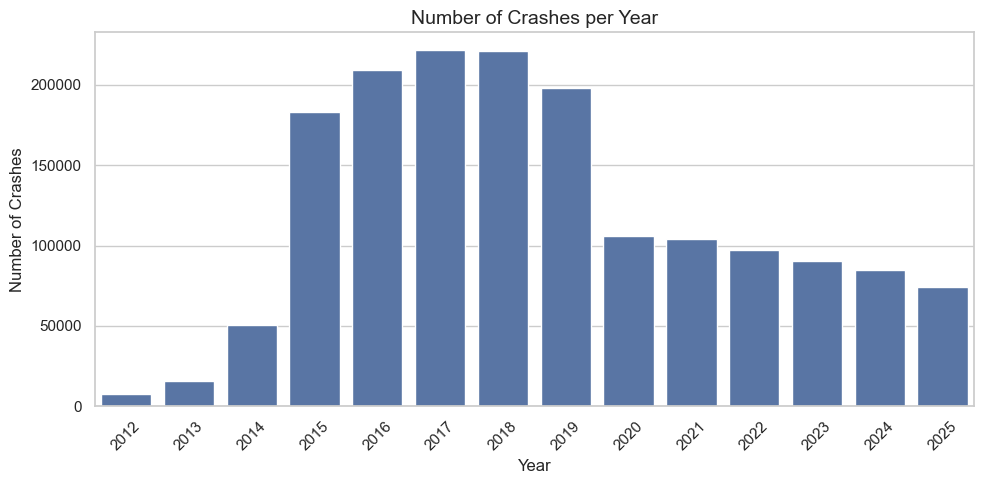

In [216]:
crashes_per_year = (
    df_crashes_clean
    .groupby("CRASH_YEAR")["COLLISION_ID"]
    .nunique()
    .reset_index(name="num_crashes")
    .sort_values("CRASH_YEAR")
)

plt.figure()
sns.barplot(data=crashes_per_year, x="CRASH_YEAR", y="num_crashes")
plt.title("Number of Crashes per Year")
plt.xlabel("Year")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


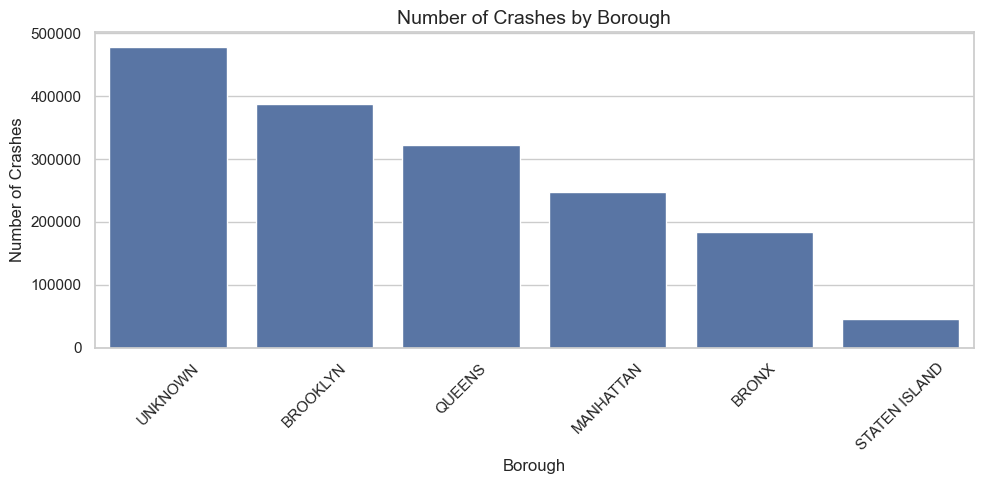

In [217]:
crashes_per_borough = (
    df_crashes_clean
    .groupby("BOROUGH")["COLLISION_ID"]
    .nunique()
    .reset_index(name="num_crashes")
    .sort_values("num_crashes", ascending=False)
)

plt.figure()
sns.barplot(data=crashes_per_borough, x="BOROUGH", y="num_crashes")
plt.title("Number of Crashes by Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


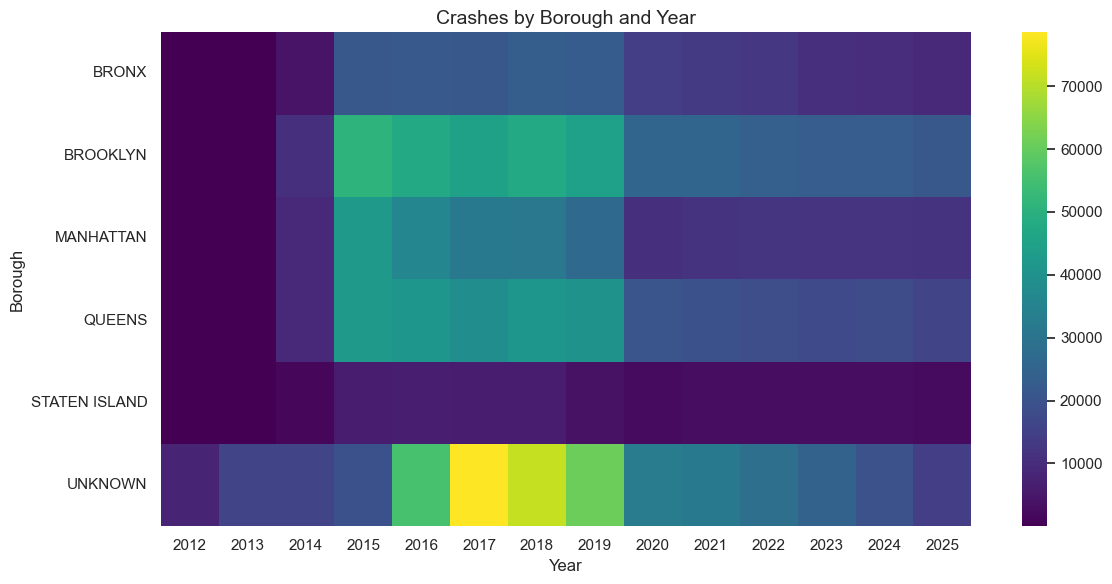

In [218]:
crashes_borough_year = (
    df_crashes_clean
    .groupby(["CRASH_YEAR", "BOROUGH"])["COLLISION_ID"]
    .nunique()
    .reset_index(name="num_crashes")
)

pivot_borough_year = crashes_borough_year.pivot(
    index="BOROUGH",
    columns="CRASH_YEAR",
    values="num_crashes"
)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_borough_year, annot=False, cmap="viridis")
plt.title("Crashes by Borough and Year")
plt.xlabel("Year")
plt.ylabel("Borough")
plt.tight_layout()
plt.show()


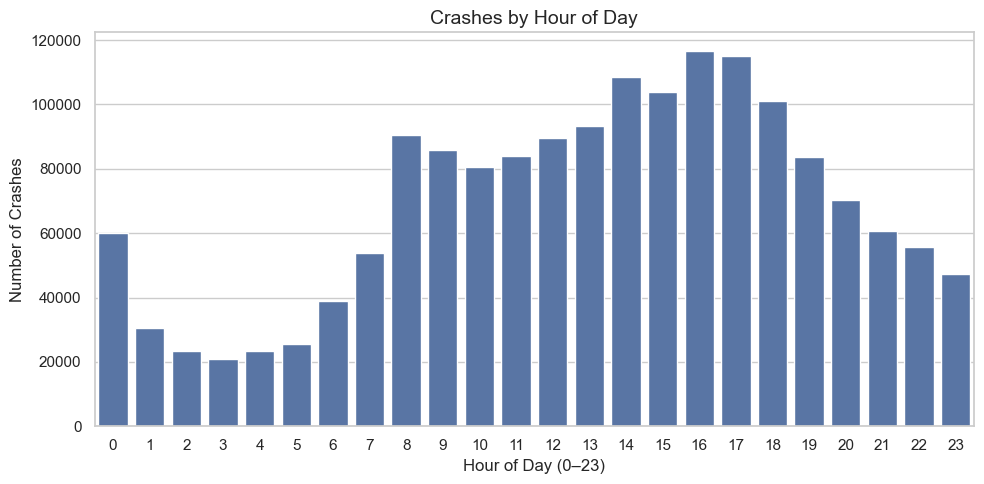

In [219]:
crashes_per_hour = (
    df_crashes_clean
    .groupby("CRASH_HOUR")["COLLISION_ID"]
    .nunique()
    .reset_index(name="num_crashes")
    .sort_values("CRASH_HOUR")
)

plt.figure()
sns.barplot(data=crashes_per_hour, x="CRASH_HOUR", y="num_crashes")
plt.title("Crashes by Hour of Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Crashes")
plt.tight_layout()
plt.show()


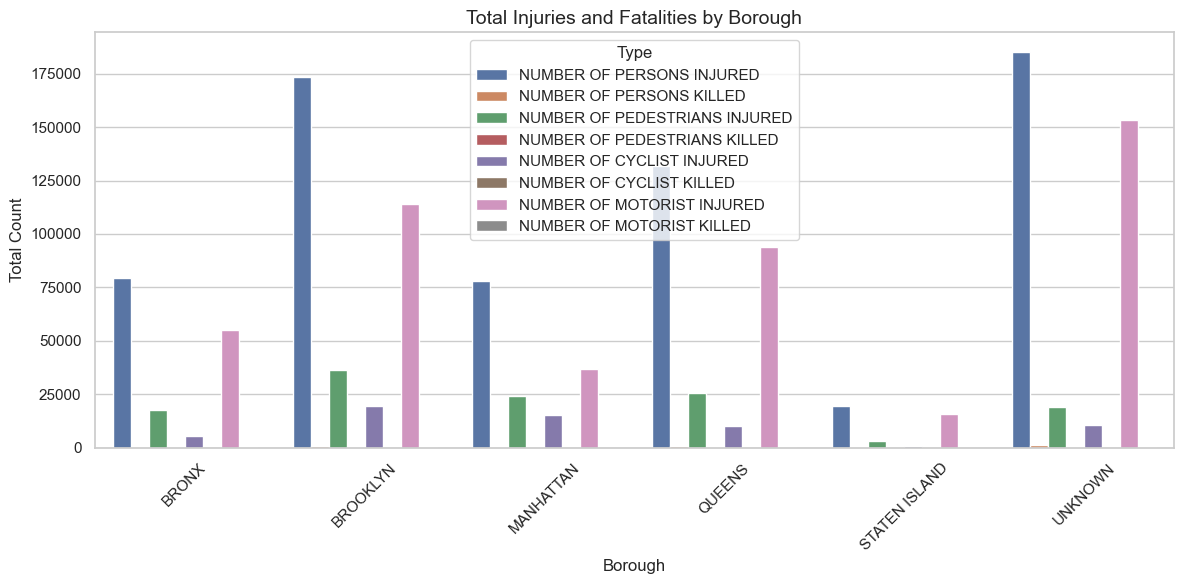

In [220]:
injury_cols = [
    col for col in df_crashes_clean.columns
    if ("INJURED" in col) or ("KILLED" in col)
]

injury_borough = (
    df_crashes_clean
    .groupby("BOROUGH")[injury_cols]
    .sum()
    .reset_index()
)

injury_borough_long = injury_borough.melt(
    id_vars="BOROUGH",
    value_vars=injury_cols,
    var_name="injury_type",
    value_name="count"
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=injury_borough_long,
    x="BOROUGH",
    y="count",
    hue="injury_type"
)
plt.title("Total Injuries and Fatalities by Borough")
plt.xlabel("Borough")
plt.ylabel("Total Count")
plt.xticks(rotation=45)
plt.legend(title="Type")
plt.tight_layout()
plt.show()


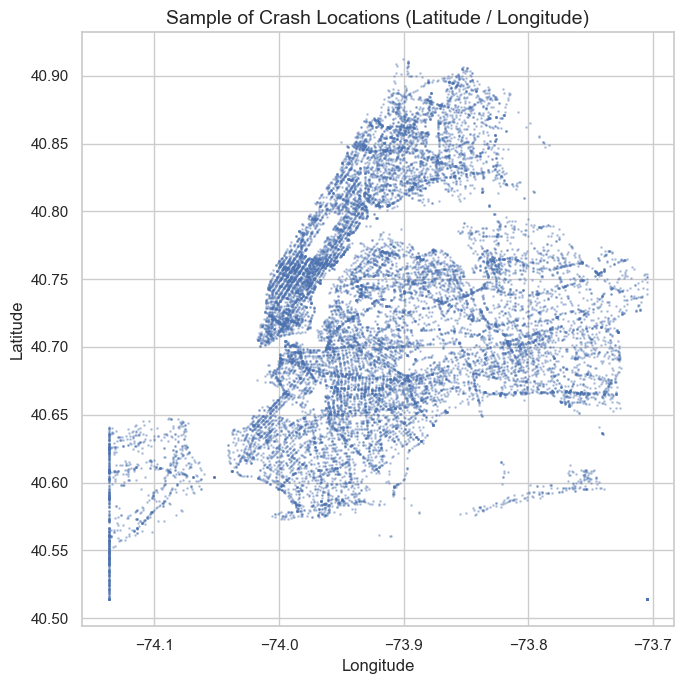

In [221]:
sample_size = 20000

df_crashes_sample = df_crashes_clean.dropna(
    subset=["LATITUDE", "LONGITUDE"]
).sample(
    n=min(sample_size, df_crashes_clean.shape[0]),
    random_state=42
)

plt.figure(figsize=(7, 7))
plt.scatter(
    df_crashes_sample["LONGITUDE"],
    df_crashes_sample["LATITUDE"],
    s=1,
    alpha=0.3
)
plt.title("Sample of Crash Locations (Latitude / Longitude)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()


## Persons Dataset Visualizations (df_persons_clean)

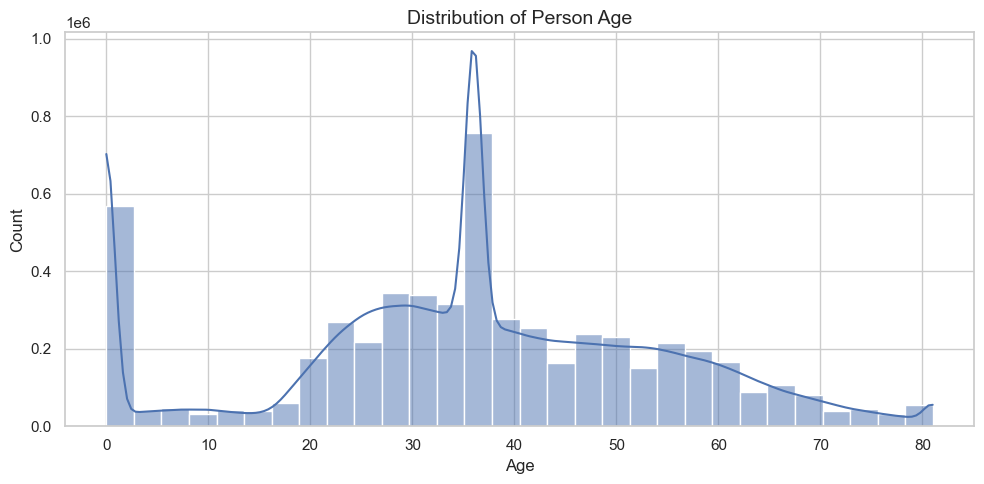

In [222]:
plt.figure()
sns.histplot(
    data=df_persons_clean,
    x="PERSON_AGE",
    bins=30,
    kde=True
)
plt.title("Distribution of Person Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


  PERSON_INJURY    count
0   Unspecified  4986369
1       Injured   595287
2        Killed     1773


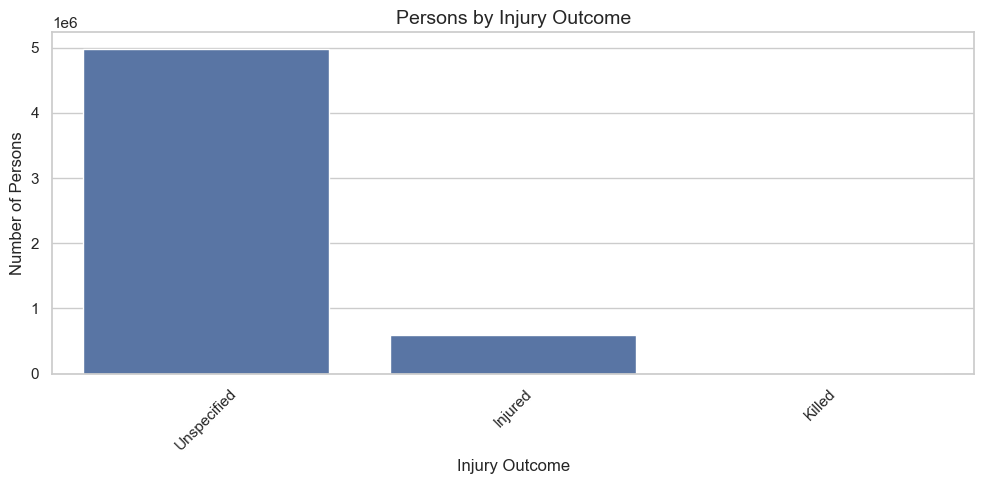

In [223]:

if "PERSON_INJURY" in df_persons_clean.columns:
    # Build a clean summary table: one column for injury type, one for count
    persons_injury_counts = (
        df_persons_clean["PERSON_INJURY"]
        .value_counts()
        .reset_index(name="count")   # 'count' column
        .rename(columns={"index": "PERSON_INJURY"})  # injury label column
    )

    print(persons_injury_counts.head())  # optional: sanity check

    plt.figure()
    sns.barplot(
        data=persons_injury_counts,
        x="PERSON_INJURY",
        y="count"
    )
    plt.title("Persons by Injury Outcome")
    plt.xlabel("Injury Outcome")
    plt.ylabel("Number of Persons")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Column PERSON_INJURY not found in df_persons_clean.")


       PERSON_TYPE    count
0         Occupant  5492878
1        Bicyclist    78302
2  Other Motorized    12237
3       Pedestrian       12


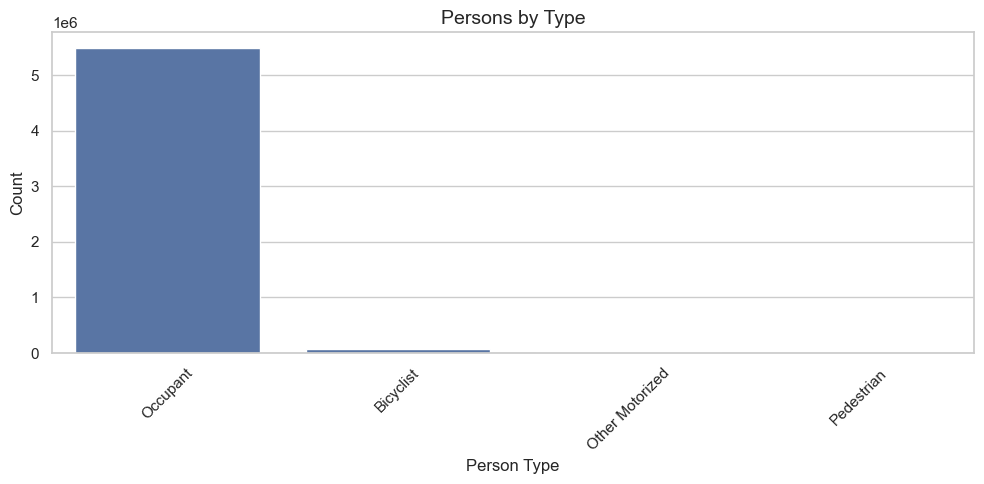

In [224]:
# B.3 — Persons by Type (fixed version)

if "PERSON_TYPE" in df_persons_clean.columns:
    # Build a clean summary table
    persons_type_counts = (
        df_persons_clean["PERSON_TYPE"]
        .value_counts()
        .reset_index(name="count")
        .rename(columns={"index": "PERSON_TYPE"})
    )

    print(persons_type_counts.head())  # optional debug

    plt.figure()
    sns.barplot(
        data=persons_type_counts,
        x="PERSON_TYPE",
        y="count"
    )
    plt.title("Persons by Type")
    plt.xlabel("Person Type")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

else:
    print("Column PERSON_TYPE not found in df_persons_clean")


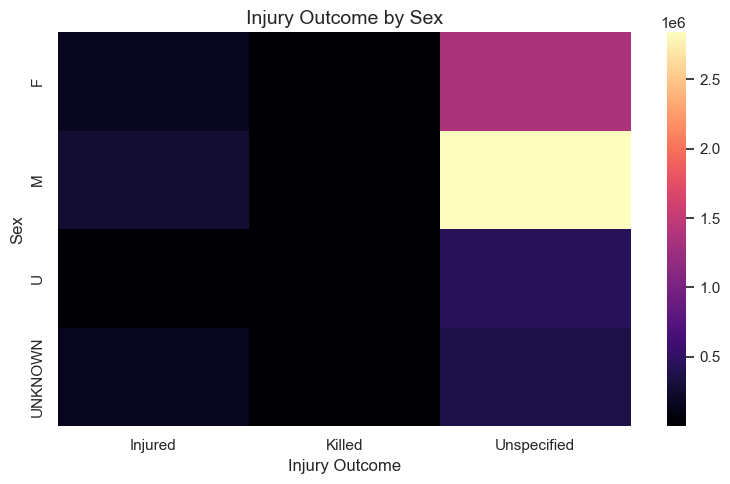

In [225]:
if {"PERSON_SEX", "PERSON_INJURY"}.issubset(df_persons_clean.columns):
    injury_sex_ct = pd.crosstab(
        df_persons_clean["PERSON_SEX"],
        df_persons_clean["PERSON_INJURY"]
    )

    plt.figure(figsize=(8, 5))
    sns.heatmap(
        injury_sex_ct,
        annot=False,
        cmap="magma"
    )
    plt.title("Injury Outcome by Sex")
    plt.xlabel("Injury Outcome")
    plt.ylabel("Sex")
    plt.tight_layout()
    plt.show()


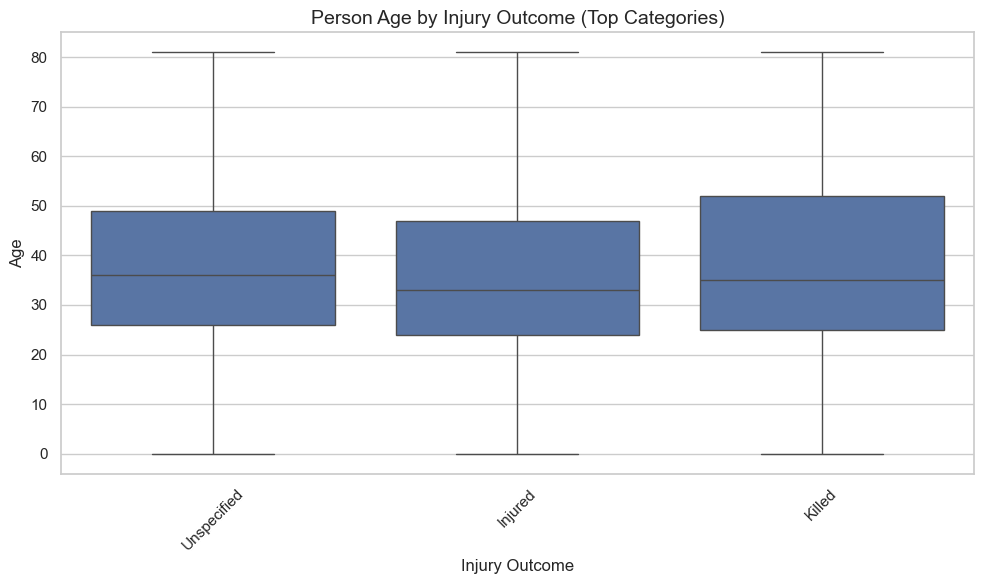

In [226]:
if "PERSON_INJURY" in df_persons_clean.columns:
    main_injuries = (
        df_persons_clean["PERSON_INJURY"]
        .value_counts()
        .index[:4]
    )

    df_age_injury = df_persons_clean[
        df_persons_clean["PERSON_INJURY"].isin(main_injuries)
    ]

    plt.figure(figsize=(10, 6))
    sns.boxplot(
        data=df_age_injury,
        x="PERSON_INJURY",
        y="PERSON_AGE"
    )
    plt.title("Person Age by Injury Outcome (Top Categories)")
    plt.xlabel("Injury Outcome")
    plt.ylabel("Age")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Integration

In [227]:
# Ensure both keys are clean + same type
df_crashes_clean["COLLISION_ID"] = df_crashes_clean["COLLISION_ID"].astype(str)
df_persons_clean["COLLISION_ID"] = df_persons_clean["COLLISION_ID"].astype(str)

print("Crashes rows:", df_crashes_clean.shape)
print("Persons rows:", df_persons_clean.shape)


Crashes rows: (2019265, 31)
Persons rows: (5583429, 17)


In [228]:
df_integrated = df_crashes_clean.merge(
    df_persons_clean,
    on="COLLISION_ID",
    how="left",
    suffixes=("_CRASH", "_PERSON")
)

print("Integrated dataset shape:", df_integrated.shape)


Integrated dataset shape: (2019265, 47)


In [229]:
df_integrated = df_integrated.loc[:, ~df_integrated.columns.duplicated()]

# Convert persons CRASH_DATE/CRASH_TIME so types won't break visualizations
if "CRASH_DATE" in df_integrated.columns:
    df_integrated["CRASH_DATE"] = pd.to_datetime(
        df_integrated["CRASH_DATE"], errors="coerce"
    )

if "CRASH_TIME" in df_integrated.columns:
    df_integrated["CRASH_TIME"] = pd.to_datetime(
        df_integrated["CRASH_TIME"], errors="coerce"
    )

In [230]:
df_integrated.to_csv("integrated_dataset.csv", index=False)

print("✔ Integrated dataset saved as 'integrated_dataset.csv'")
df_integrated.head()

✔ Integrated dataset saved as 'integrated_dataset.csv'


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,...,VEHICLE_ID,PERSON_AGE,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,COMPLAINT,PED_ROLE,PERSON_SEX
0,2023-11-01,1900-01-01 01:29:00,BROOKLYN,11230.0,40.621790,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,1,...,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>
1,2021-09-11,1900-01-01 09:35:00,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",UNKNOWN,UNKNOWN,0,...,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>
2,2021-12-14,1900-01-01 08:13:00,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,0,...,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>
3,2021-12-14,1900-01-01 17:05:00,UNKNOWN,NaN,40.709183,-73.956825,"(40.709183, -73.956825)",BROOKLYN QUEENS EXPRESSWAY,UNKNOWN,0,...,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>
4,2021-12-14,1900-01-01 08:17:00,BRONX,10475.0,40.868160,-73.831480,"(40.86816, -73.83148)",UNKNOWN,UNKNOWN,2,...,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>


# Post Integration

In [231]:
# ----------------------------------------------------------
# 0. Normalize COLLISION_ID and create df_post from crashes + persons (LEFT JOIN)
# ----------------------------------------------------------

# Ensure COLLISION_ID has consistent string format in both dataframes
for df_tmp in [df_crashes_clean, df_persons_clean]:
    df_tmp["COLLISION_ID"] = (
        df_tmp["COLLISION_ID"]
        .astype(str)
        .str.strip()
        .str.replace(".0", "", regex=False)
    )

print("Crashes COLLISION_ID sample:", df_crashes_clean["COLLISION_ID"].head().tolist())
print("Persons COLLISION_ID sample:", df_persons_clean["COLLISION_ID"].head().tolist())

df_integrated = df_crashes_clean.merge(
    df_persons_clean,
    on="COLLISION_ID",
    how="left",
    suffixes=("", "_PERSON")
)

df_post = df_integrated.copy()

print("Integrated shape:", df_post.shape)
print(df_post.head())

Crashes COLLISION_ID sample: ['4675373', '4456314', '4486609', '4486555', '4486660']
Persons COLLISION_ID sample: ['4229554', '4230587', '4230550', '4231168', '4230743']
Integrated shape: (5771559, 47)
  CRASH DATE          CRASH TIME   BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0 2023-11-01 1900-01-01 01:29:00  BROOKLYN  11230.0  40.621790 -73.970024   
1 2023-11-01 1900-01-01 01:29:00  BROOKLYN  11230.0  40.621790 -73.970024   
2 2021-09-11 1900-01-01 09:35:00  BROOKLYN  11208.0  40.667202 -73.866500   
3 2021-09-11 1900-01-01 09:35:00  BROOKLYN  11208.0  40.667202 -73.866500   
4 2021-12-14 1900-01-01 08:13:00  BROOKLYN  11233.0  40.683304 -73.917274   

                  LOCATION   ON STREET NAME CROSS STREET NAME  \
0   (40.62179, -73.970024)    OCEAN PARKWAY          AVENUE K   
1   (40.62179, -73.970024)    OCEAN PARKWAY          AVENUE K   
2    (40.667202, -73.8665)          UNKNOWN           UNKNOWN   
3    (40.667202, -73.8665)          UNKNOWN           UNKNOWN   
4  (40.683

In [232]:
# ----------------------------------------------------------
# 1. Re-handle missing values created by the LEFT JOIN
# ----------------------------------------------------------

# Identify real person records
REAL_PERSON = df_post["PERSON_ID"].notna()

person_categorical = [
    "PERSON_TYPE", "PERSON_INJURY", "EJECTION", "EMOTIONAL_STATUS",
    "BODILY_INJURY", "POSITION_IN_VEHICLE", "SAFETY_EQUIPMENT",
    "PED_ROLE", "PERSON_SEX"
]

# Fill missing values ONLY for real persons
for col in person_categorical:
    if col in df_post.columns:
        df_post.loc[REAL_PERSON, col] = (
            df_post.loc[REAL_PERSON, col]
            .astype("string")
            .fillna("UNKNOWN")
        )

# Fix PERSON_AGE only for real persons
if "PERSON_AGE" in df_post.columns:
    df_post.loc[REAL_PERSON, "PERSON_AGE"] = pd.to_numeric(
        df_post.loc[REAL_PERSON, "PERSON_AGE"], errors="coerce"
    )


In [233]:
print("Crashes COLLISION_ID sample:")
print(df_crashes_clean["COLLISION_ID"].dropna().astype(str).head(20))

print("\nPersons COLLISION_ID sample:")
print(df_persons_clean["COLLISION_ID"].dropna().astype(str).head(20))

print("\nBiggest 20 unique values from crashes:")
print(df_crashes_clean["COLLISION_ID"].dropna().unique()[:20])

print("\nBiggest 20 unique values from persons:")
print(df_persons_clean["COLLISION_ID"].dropna().unique()[:20])


Crashes COLLISION_ID sample:
2     4675373
9     4456314
10    4486609
12    4486555
13    4486660
14    4487074
15    4486519
16    4486934
17    4487127
19    4486564
20    4486635
21    4486604
22    4486991
24    4487040
25    4486537
26    4486905
27    4487122
28    4486967
29    4486304
30    4487001
Name: COLLISION_ID, dtype: object

Persons COLLISION_ID sample:
0     4229554
1     4230587
2     4230550
4     4231168
5     4230743
6     4230047
8     4229808
9     4230915
10    4230737
11    4230840
12    4230701
13    4230916
14    4231183
15    4230912
16    4230665
17    4230576
18    4230715
19    4230612
20    4230679
21    4229587
Name: COLLISION_ID, dtype: object

Biggest 20 unique values from crashes:
['4675373' '4456314' '4486609' '4486555' '4486660' '4487074' '4486519'
 '4486934' '4487127' '4486564' '4486635' '4486604' '4486991' '4487040'
 '4486537' '4486905' '4487122' '4486967' '4486304' '4487001']

Biggest 20 unique values from persons:
['4229554' '4230587' '4230550

In [234]:
# 2. Convert date columns again to avoid dtype conflicts
# ----------------------------------------------------------

date_cols = ["CRASH DATE", "CRASH_DATE"]
for col in date_cols:
    if col in df_post.columns:
        df_post[col] = pd.to_datetime(df_post[col], errors="coerce")

time_cols = ["CRASH TIME", "CRASH_TIME"]
for col in time_cols:
    if col in df_post.columns:
        df_post[col] = pd.to_datetime(df_post[col], errors="coerce").dt.time


In [235]:
# 3. Remove duplicate rows after merge expansion
# ----------------------------------------------------------

before = df_post.shape[0]
df_post = df_post.drop_duplicates()
after = df_post.shape[0]

print("Duplicates removed:", before - after)


Duplicates removed: 1


In [236]:
# 4. Final sanity checks
# ----------------------------------------------------------

print("\nNull percentages after post-cleaning:")
print(df_post.isna().mean().sort_values(ascending=False).head(10))

print("\nFinal shape:", df_post.shape)

# Save final version
df_post.to_csv("integrated_cleaned_final.csv", index=False)
print("✔ Saved final integrated dataset as integrated_cleaned_final.csv")


Null percentages after post-cleaning:
COMPLAINT           0.517916
ZIP CODE            0.308292
PERSON_SEX          0.109927
EMOTIONAL_STATUS    0.109927
CRASH_TIME          0.109927
PERSON_ID           0.109927
PERSON_TYPE         0.109927
PERSON_INJURY       0.109927
VEHICLE_ID          0.109927
PERSON_AGE          0.109927
dtype: float64

Final shape: (5771558, 47)
✔ Saved final integrated dataset as integrated_cleaned_final.csv


# Post-Integration Visualizations

In [237]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12

# Keep only rows where there is an actual person record
df_person_events = df_post[df_post["PERSON_ID"].notna()].copy()

print("Integrated rows:", df_post.shape[0])
print("Rows with person records:", df_person_events.shape[0])

Integrated rows: 5771558
Rows with person records: 5137107


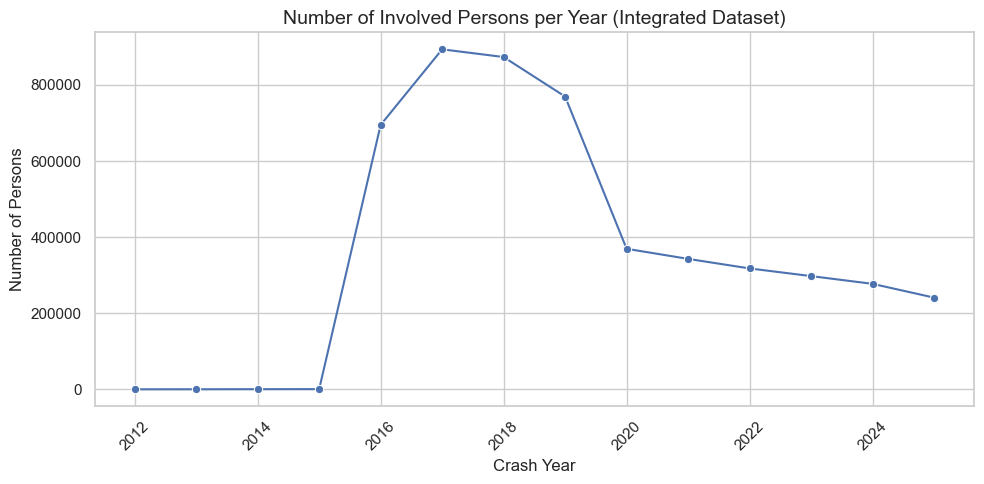

In [238]:
persons_per_year = (
    df_person_events
    .groupby("CRASH_YEAR")["PERSON_ID"]
    .nunique()
    .reset_index(name="num_persons")
    .sort_values("CRASH_YEAR")
)

plt.figure()
sns.lineplot(data=persons_per_year, x="CRASH_YEAR", y="num_persons", marker="o")
plt.title("Number of Involved Persons per Year (Integrated Dataset)")
plt.xlabel("Crash Year")
plt.ylabel("Number of Persons")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


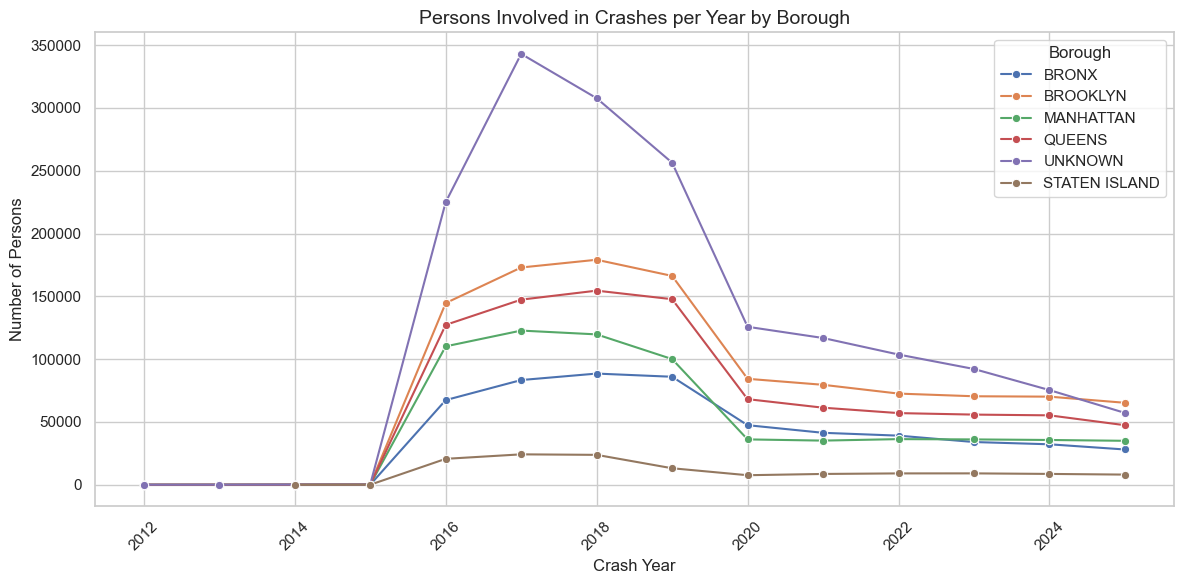

In [239]:
persons_borough_year = (
    df_person_events
    .groupby(["CRASH_YEAR", "BOROUGH"])["PERSON_ID"]
    .nunique()
    .reset_index(name="num_persons")
)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=persons_borough_year,
    x="CRASH_YEAR",
    y="num_persons",
    hue="BOROUGH",
    marker="o"
)
plt.title("Persons Involved in Crashes per Year by Borough")
plt.xlabel("Crash Year")
plt.ylabel("Number of Persons")
plt.xticks(rotation=45)
plt.legend(title="Borough")
plt.tight_layout()
plt.show()


In [240]:
print("df_persons_clean shape:", df_persons_clean.shape)
print("\nHEAD:")
print(df_persons_clean.head())

print("\nCOLUMNS:")
print(df_persons_clean.columns)

if "PERSON_INJURY" in df_persons_clean.columns:
    print("\nUnique PERSON_INJURY values:")
    print(df_persons_clean["PERSON_INJURY"].dropna().unique()[:20])
else:
    print("\nPERSON_INJURY column not found.")


df_persons_clean shape: (5583429, 17)

HEAD:
   UNIQUE_ID COLLISION_ID CRASH_DATE          CRASH_TIME  \
0   10249006      4229554 2019-10-26 1900-01-01 09:43:00   
1   10255054      4230587 2019-10-25 1900-01-01 15:15:00   
2   10253177      4230550 2019-10-26 1900-01-01 17:55:00   
4   10255516      4231168 2019-10-25 1900-01-01 11:16:00   
5   10253606      4230743 2019-10-24 1900-01-01 19:15:00   

                              PERSON_ID PERSON_TYPE PERSON_INJURY  VEHICLE_ID  \
0  31aa2bc0-f545-444f-8cdb-f1cb5cf00b89    Occupant   Unspecified  19141108.0   
1  4629e500-a73e-48dc-b8fb-53124d124b80    Occupant   Unspecified  19144075.0   
2  ae48c136-1383-45db-83f4-2a5eecfb7cff    Occupant   Unspecified  19143133.0   
4  e038e18f-40fb-4471-99cf-345eae36e064    Occupant   Unspecified  19144329.0   
5  84bcb3a7-d201-4c61-9e30-fe29268c1074    Occupant       Injured  19143343.0   

   PERSON_AGE     EJECTION EMOTIONAL_STATUS   BODILY_INJURY  \
0        36.0      UNKNOWN          UNKNOWN 

In [241]:
if "PERSON_ID" in df_persons_clean.columns:
    print("Rows with PERSON_ID:", df_persons_clean["PERSON_ID"].notna().sum())
else:
    print("PERSON_ID column not found.")


Rows with PERSON_ID: 5583429


In [242]:
print("df_integrated shape:", df_integrated.shape)
print("\nHEAD:")
print(df_integrated.head())

if "PERSON_INJURY" in df_integrated.columns:
    print("\nUnique PERSON_INJURY in df_integrated:",
          df_integrated["PERSON_INJURY"].dropna().unique()[:20])
else:
    print("\nPERSON_INJURY missing from df_integrated.")

if "PERSON_TYPE" in df_integrated.columns:
    print("Unique PERSON_TYPE in df_integrated:",
          df_integrated["PERSON_TYPE"].dropna().unique()[:20])
else:
    print("PERSON_TYPE missing from df_integrated.")


df_integrated shape: (5771559, 47)

HEAD:
  CRASH DATE          CRASH TIME   BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0 2023-11-01 1900-01-01 01:29:00  BROOKLYN  11230.0  40.621790 -73.970024   
1 2023-11-01 1900-01-01 01:29:00  BROOKLYN  11230.0  40.621790 -73.970024   
2 2021-09-11 1900-01-01 09:35:00  BROOKLYN  11208.0  40.667202 -73.866500   
3 2021-09-11 1900-01-01 09:35:00  BROOKLYN  11208.0  40.667202 -73.866500   
4 2021-12-14 1900-01-01 08:13:00  BROOKLYN  11233.0  40.683304 -73.917274   

                  LOCATION   ON STREET NAME CROSS STREET NAME  \
0   (40.62179, -73.970024)    OCEAN PARKWAY          AVENUE K   
1   (40.62179, -73.970024)    OCEAN PARKWAY          AVENUE K   
2    (40.667202, -73.8665)          UNKNOWN           UNKNOWN   
3    (40.667202, -73.8665)          UNKNOWN           UNKNOWN   
4  (40.683304, -73.917274)  SARATOGA AVENUE    DECATUR STREET   

   NUMBER OF PERSONS INJURED  ...  VEHICLE_ID  PERSON_AGE     EJECTION  \
0                          1  

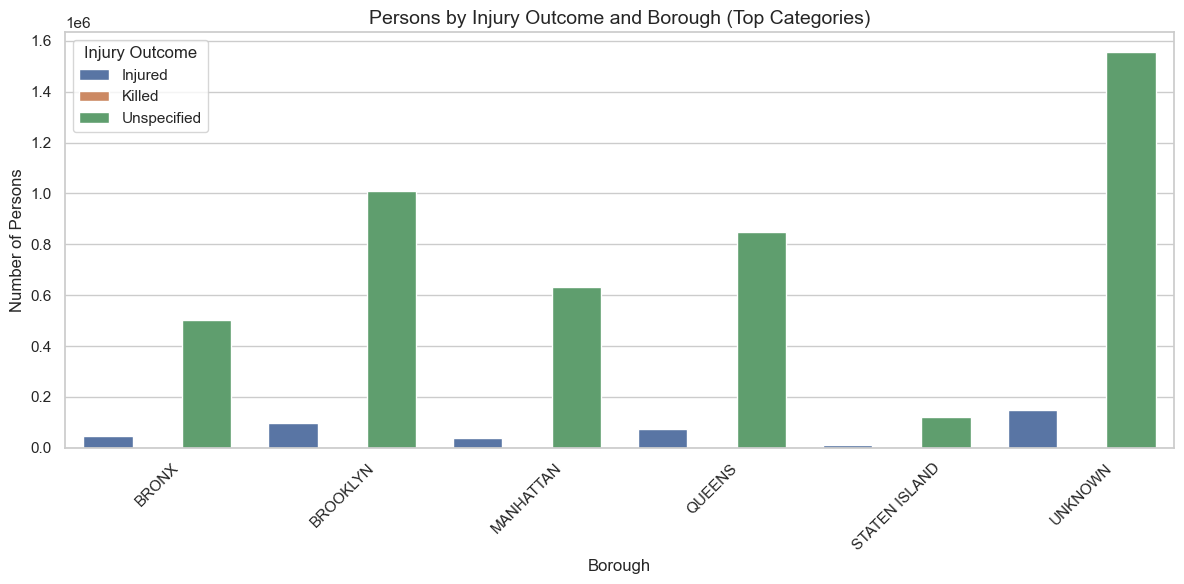

In [243]:
# Focus on top 4 injury categories to keep the plot readable
top_injuries = (
    df_person_events["PERSON_INJURY"]
    .value_counts()
    .index[:4]
)

df_injury_borough_top = df_person_events[
    df_person_events["PERSON_INJURY"].isin(top_injuries)
]

injury_borough_long = (
    df_injury_borough_top
    .groupby(["BOROUGH", "PERSON_INJURY"])["PERSON_ID"]
    .nunique()
    .reset_index(name="num_persons")
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=injury_borough_long,
    x="BOROUGH",
    y="num_persons",
    hue="PERSON_INJURY"
)
plt.title("Persons by Injury Outcome and Borough (Top Categories)")
plt.xlabel("Borough")
plt.ylabel("Number of Persons")
plt.xticks(rotation=45)
plt.legend(title="Injury Outcome")
plt.tight_layout()
plt.show()


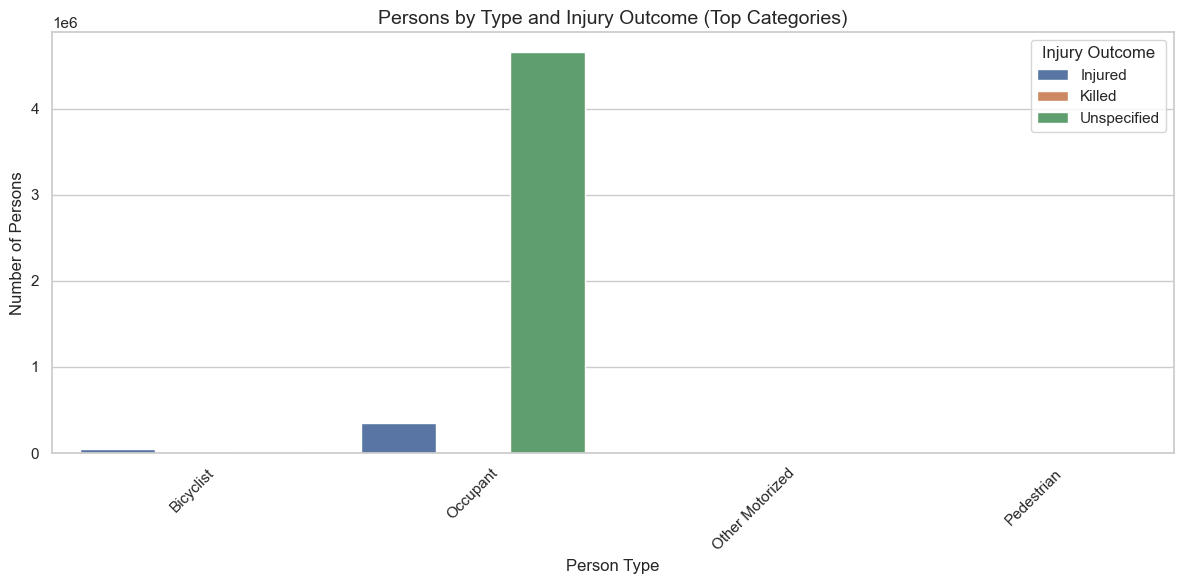

In [244]:
if "PERSON_TYPE" in df_person_events.columns:
    # Limit to top person types and injury types
    top_types = df_person_events["PERSON_TYPE"].value_counts().index[:4]
    top_injuries = df_person_events["PERSON_INJURY"].value_counts().index[:4]

    df_type_injury = df_person_events[
        df_person_events["PERSON_TYPE"].isin(top_types)
        & df_person_events["PERSON_INJURY"].isin(top_injuries)
    ]

    type_injury_counts = (
        df_type_injury
        .groupby(["PERSON_TYPE", "PERSON_INJURY"])["PERSON_ID"]
        .nunique()
        .reset_index(name="num_persons")
    )

    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=type_injury_counts,
        x="PERSON_TYPE",
        y="num_persons",
        hue="PERSON_INJURY"
    )
    plt.title("Persons by Type and Injury Outcome (Top Categories)")
    plt.xlabel("Person Type")
    plt.ylabel("Number of Persons")
    plt.xticks(rotation=45)
    plt.legend(title="Injury Outcome")
    plt.tight_layout()
    plt.show()
else:
    print("PERSON_TYPE column not found in df_post.")


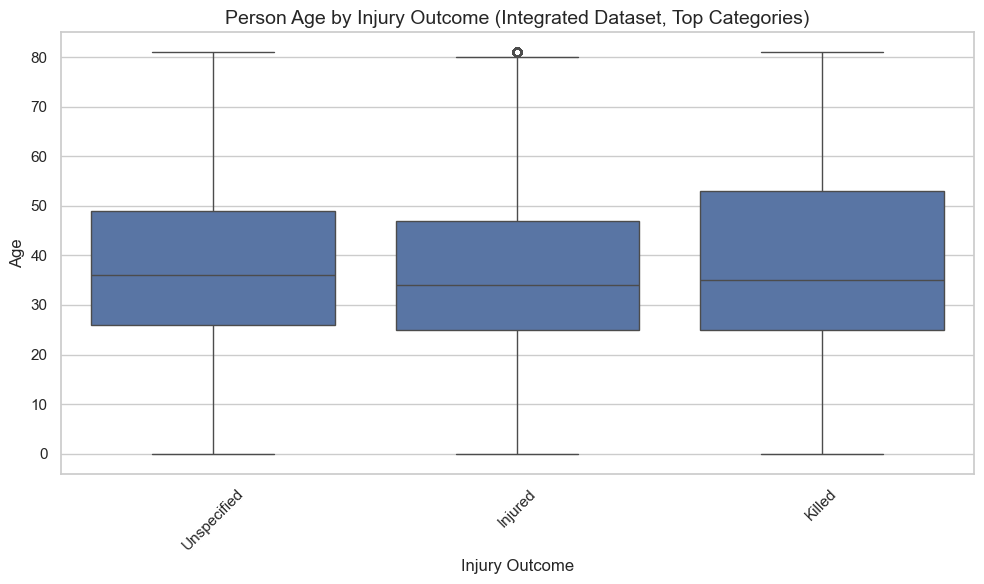

In [245]:
df_age = df_person_events[
    df_person_events["PERSON_AGE"].notna()
].copy()

# Use top injury categories
top_injuries_age = df_age["PERSON_INJURY"].value_counts().index[:4]
df_age_top = df_age[df_age["PERSON_INJURY"].isin(top_injuries_age)]

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_age_top,
    x="PERSON_INJURY",
    y="PERSON_AGE"
)
plt.title("Person Age by Injury Outcome (Integrated Dataset, Top Categories)")
plt.xlabel("Injury Outcome")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


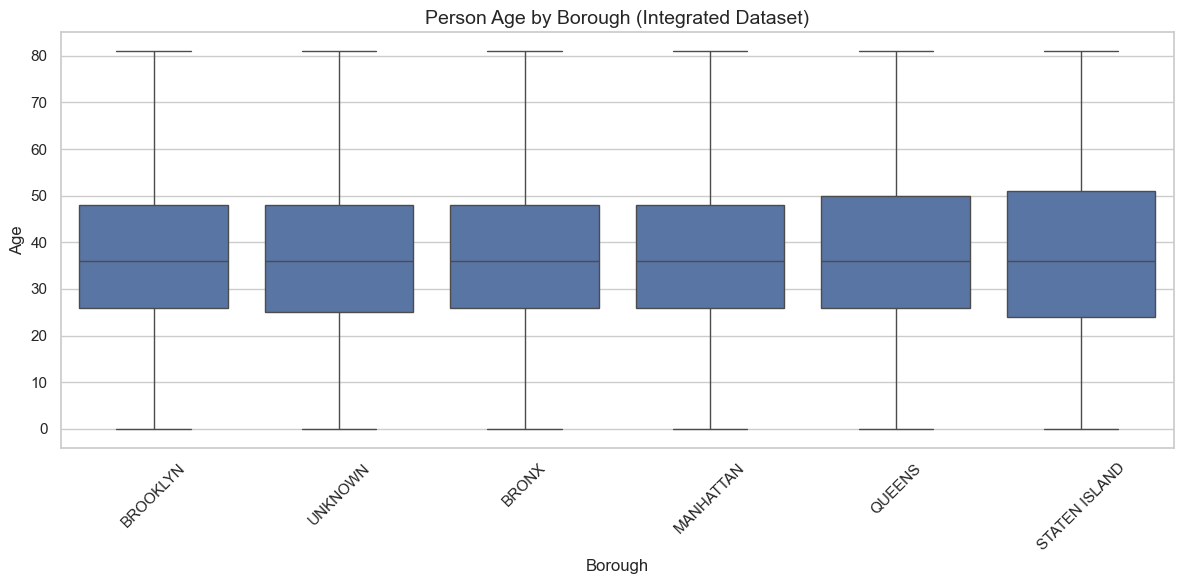

In [246]:
df_age_borough = df_age[
    df_age["BOROUGH"].notna()
].copy()

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_age_borough,
    x="BOROUGH",
    y="PERSON_AGE"
)
plt.title("Person Age by Borough (Integrated Dataset)")
plt.xlabel("Borough")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Number of pedestrian rows: 11


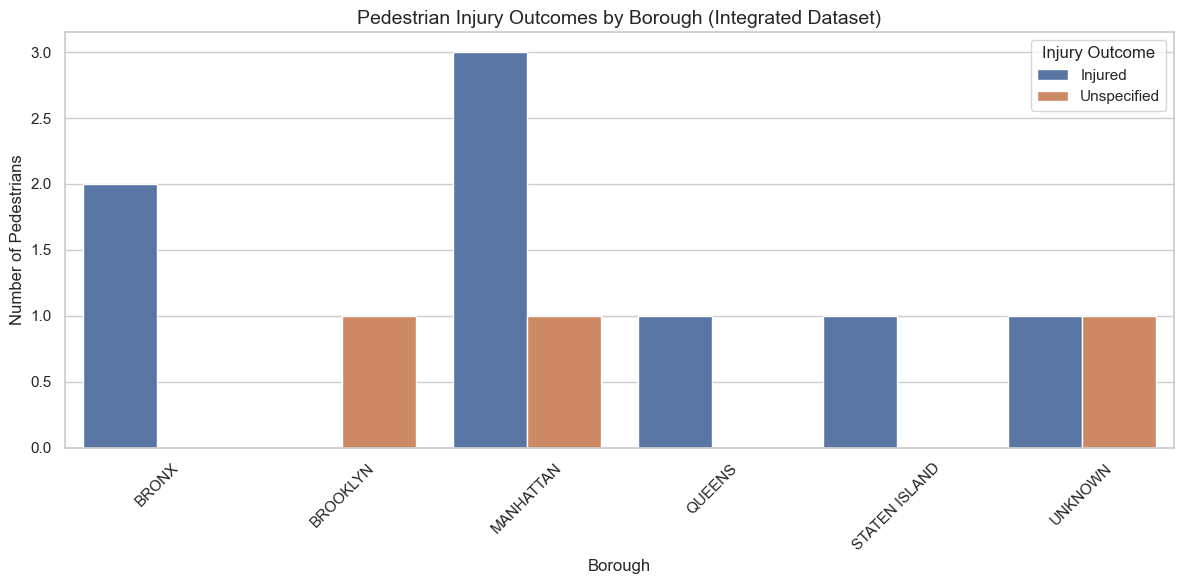

In [247]:
# Define pedestrians in a robust way (case-insensitive match)
is_pedestrian = df_person_events["PERSON_TYPE"].astype(str).str.contains(
    "PEDESTRIAN", case=False, na=False
)

df_ped = df_person_events[is_pedestrian].copy()

print("Number of pedestrian rows:", df_ped.shape[0])

if df_ped.shape[0] > 0:
    ped_injury_borough = (
        df_ped
        .groupby(["BOROUGH", "PERSON_INJURY"])["PERSON_ID"]
        .nunique()
        .reset_index(name="num_persons")
    )

    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=ped_injury_borough,
        x="BOROUGH",
        y="num_persons",
        hue="PERSON_INJURY"
    )
    plt.title("Pedestrian Injury Outcomes by Borough (Integrated Dataset)")
    plt.xlabel("Borough")
    plt.ylabel("Number of Pedestrians")
    plt.xticks(rotation=45)
    plt.legend(title="Injury Outcome")
    plt.tight_layout()
    plt.show()
else:
    print("No pedestrian records found in df_post.")


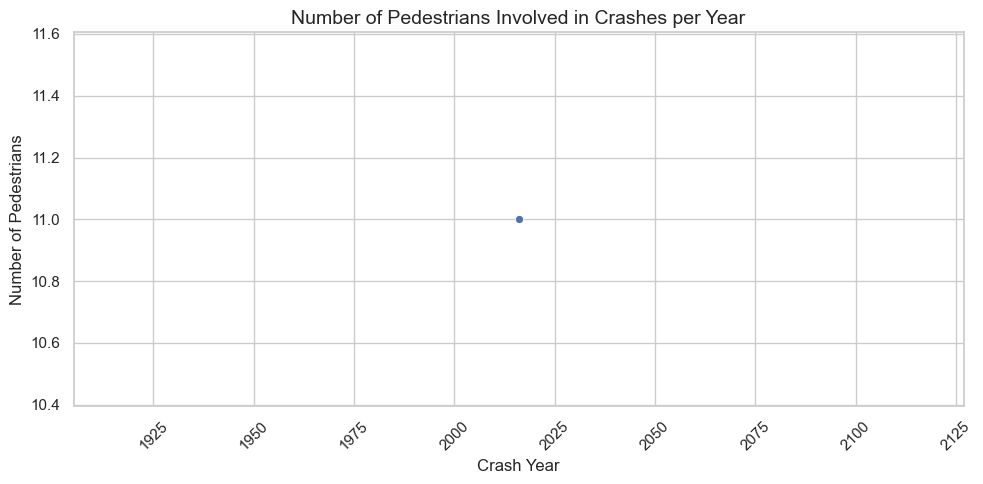

In [248]:
if df_ped.shape[0] > 0:
    ped_per_year = (
        df_ped
        .groupby("CRASH_YEAR")["PERSON_ID"]
        .nunique()
        .reset_index(name="num_pedestrians")
        .sort_values("CRASH_YEAR")
    )

    plt.figure()
    sns.lineplot(
        data=ped_per_year,
        x="CRASH_YEAR",
        y="num_pedestrians",
        marker="o"
    )
    plt.title("Number of Pedestrians Involved in Crashes per Year")
    plt.xlabel("Crash Year")
    plt.ylabel("Number of Pedestrians")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [249]:
# =========================================
# Save final cleaned integrated dataset
# =========================================

# Optional: choose only the columns you care about for the dashboard
cols_to_keep = [
    # Crash-level info
    "COLLISION_ID",
    "CRASH DATE",
    "CRASH TIME",
    "BOROUGH",
    "ZIP CODE",
    "LATITUDE",
    "LONGITUDE",
    "LOCATION",
    "ON STREET NAME",
    "CROSS STREET NAME",
    "NUMBER OF PERSONS INJURED",
    "NUMBER OF PERSONS KILLED",
    "NUMBER OF PEDESTRIANS INJURED",
    "NUMBER OF PEDESTRIANS KILLED",
    "NUMBER OF CYCLIST INJURED",
    "NUMBER OF CYCLIST KILLED",
    "NUMBER OF MOTORIST INJURED",
    "NUMBER OF MOTORIST KILLED",
    "CONTRIBUTING FACTOR VEHICLE 1",
    "VEHICLE TYPE CODE 1",
    "CRASH_YEAR",
    "CRASH_MONTH",
    "CRASH_HOUR",

    # Person-level info (from persons dataset)
    "PERSON_ID",
    "PERSON_TYPE",
    "PERSON_INJURY",
    "PERSON_AGE",
    "PERSON_SEX",
    "BODILY_INJURY",
    "POSITION_IN_VEHICLE",
    "SAFETY_EQUIPMENT",
    "PED_ROLE",
]

# Keep only columns that actually exist (to avoid KeyError)
cols_existing = [c for c in cols_to_keep if c in df_post.columns]

df_final = df_post[cols_existing].copy()

print("Final integrated shape:", df_final.shape)
print("Columns in final dataset:", df_final.columns.tolist()[:20], "...")

# Save to CSV
output_name = "integrated_cleaned_final1.csv"
df_final.to_csv(output_name, index=False, encoding="utf-8")
print(f"✔ Cleaned integrated dataset saved as '{output_name}'")


Final integrated shape: (5771558, 32)
Columns in final dataset: ['COLLISION_ID', 'CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1', 'VEHICLE TYPE CODE 1'] ...
✔ Cleaned integrated dataset saved as 'integrated_cleaned_final1.csv'


In [250]:
import pandas as pd

test_df = pd.read_csv("integrated_cleaned_final1.csv")
print(test_df.shape)
print(test_df.head())


C:\Users\belal\AppData\Local\Temp\ipykernel_36592\1844057860.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv("integrated_cleaned_final1.csv")


(5771558, 32)
   COLLISION_ID  CRASH DATE CRASH TIME   BOROUGH ZIP CODE   LATITUDE  \
0     4675373.0  2023-11-01   01:29:00  BROOKLYN  11230.0  40.621790   
1     4675373.0  2023-11-01   01:29:00  BROOKLYN  11230.0  40.621790   
2     4456314.0  2021-09-11   09:35:00  BROOKLYN  11208.0  40.667202   
3     4456314.0  2021-09-11   09:35:00  BROOKLYN  11208.0  40.667202   
4     4486609.0  2021-12-14   08:13:00  BROOKLYN  11233.0  40.683304   

   LONGITUDE                 LOCATION   ON STREET NAME CROSS STREET NAME  ...  \
0 -73.970024   (40.62179, -73.970024)    OCEAN PARKWAY          AVENUE K  ...   
1 -73.970024   (40.62179, -73.970024)    OCEAN PARKWAY          AVENUE K  ...   
2 -73.866500    (40.667202, -73.8665)          UNKNOWN           UNKNOWN  ...   
3 -73.866500    (40.667202, -73.8665)          UNKNOWN           UNKNOWN  ...   
4 -73.917274  (40.683304, -73.917274)  SARATOGA AVENUE    DECATUR STREET  ...   

   CRASH_HOUR                             PERSON_ID  PERSON_TYPE  